<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 4 to 569
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                566 non-null    int64         
 1   ds                        566 non-null    datetime64[ns]
 2   open_price                566 non-null    float64       
 3   high_price                566 non-null    float64       
 4   low_price                 566 non-null    float64       
 5   y                         566 non-null    float64       
 6   volume                    566 non-null    int64         
 7   foreign                   566 non-null    int64         
 8   investment                566 non-null    int64         
 9   dealer                    566 non-null    int64         
 10  ratio_over_400_shares     566 non-null    float64       
 11  shareholders_400_to_600   566 non-null    int64         
 12  shareholders_600_to_800   5

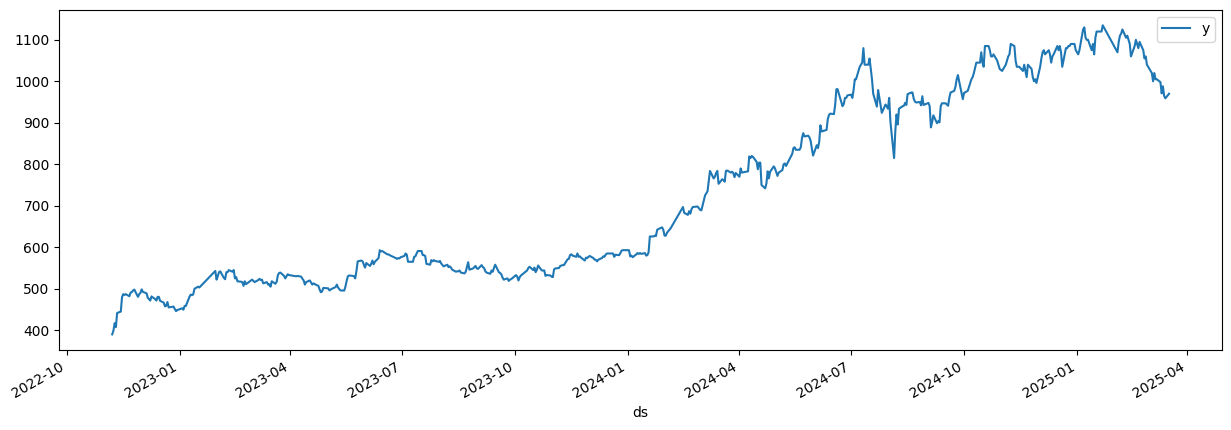

In [2]:
import pandas as pd
from sklearn.model_selection import ParameterGrid
from neuralprophet import NeuralProphet, set_log_level, set_random_seed

from src.model.features import add_stock_price_feature

# Disable logging messages unless there is an error
set_log_level("ERROR")

df = pd.read_csv('data/stocks/2330_stock_data_0317.csv', parse_dates=['ds'])
df = add_stock_price_feature(df)
plt = df.plot(x="ds", y="y", figsize=(15, 5))
df.info()

In [4]:
from src.model.utils import val_mape

param_grid = {
    'volume': [0, 5, 10, 20],
    'high_low_diff': [0, 5, 10, 20],
    'MA': [0, 5, 10, 20]
}

results = []
# Iterate over each combination of hyperparameters
for params in ParameterGrid(param_grid):
    # Initialize the NeuralProphet model with current hyperparameters
    print([params])
    m = NeuralProphet(
        yearly_seasonality=False,
        weekly_seasonality=True,
        n_lags=3,
    )
    m = m.add_country_holidays("TW")
    
    lag_regs = (
        ('volume', params['volume']),
        ('high_low_diff', params['high_low_diff']),
        ('MA', params['MA']),
    )
    columes = ['ds', 'y']
    for col, lag in lag_regs:
        if lag > 0:
            m.add_lagged_regressor(col, n_lags=lag)
            columes.append(col)
    
    df_train, df_val = m.split_df(df[columes], valid_p=0.2)
    set_random_seed(0)
    metrics = m.fit(df_train, validation_df=df_val)
    
    # Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
    df_future = m.make_future_dataframe(df[columes], n_historic_predictions=True, periods=7)

    # Predict the future
    forecast = m.predict(df_future)
    
    rmse = metrics.iloc[-1]['RMSE_val']
    mape = val_mape(df_val, forecast)
    results.append({**params, 'RMSE': rmse, 'MAPE': mape})

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



[{'MA': 0, 'high_low_diff': 0, 'volume': 0}]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 11. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 269.26it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=940, MAE_val=14.80, RMSE_val=18.10, Loss_val=0.00162, RegLoss_val=0.000, train_loss=0.000691, reg_loss=0.000, MAE=8.240, RMSE=11.90, Loss=0.000666, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 233.81it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 0, 'high_low_diff': 0, 'volume': 5}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 9. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 279.40it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=941, MAE_val=14.70, RMSE_val=17.90, Loss_val=0.00159, RegLoss_val=0.000, train_loss=0.000678, reg_loss=0.000, MAE=8.430, RMSE=11.90, Loss=0.000676, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.05it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 0, 'high_low_diff': 0, 'volume': 10}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 4. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 283.49it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=942, MAE_val=15.10, RMSE_val=18.20, Loss_val=0.00165, RegLoss_val=0.000, train_loss=0.000685, reg_loss=0.000, MAE=7.980, RMSE=11.40, Loss=0.000649, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 455.61it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 0, 'high_low_diff': 0, 'volume': 20}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 26. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 279.41it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=943, MAE_val=15.40, RMSE_val=18.60, Loss_val=0.00172, RegLoss_val=0.000, train_loss=0.000684, reg_loss=0.000, MAE=8.480, RMSE=11.90, Loss=0.00068, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 333.28it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 0, 'high_low_diff': 5, 'volume': 0}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 281.63it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=944, MAE_val=14.40, RMSE_val=17.60, Loss_val=0.00155, RegLoss_val=0.000, train_loss=0.000682, reg_loss=0.000, MAE=8.410, RMSE=12.00, Loss=0.000683, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 91.05it/s] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 0, 'high_low_diff': 5, 'volume': 5}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Epoch 140: 100%|██████████| 140/140 [00:00<00:00, 426.35it/s]   
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 286.99it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=945, MAE_val=14.60, RMSE_val=17.80, Loss_val=0.00158, RegLoss_val=0.000, train_loss=0.000685, reg_loss=0.000, MAE=8.320, RMSE=11.80, Loss=0.00067, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 249.97it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 0, 'high_low_diff': 5, 'volume': 10}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 278.90it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=946, MAE_val=15.40, RMSE_val=18.60, Loss_val=0.00173, RegLoss_val=0.000, train_loss=0.000691, reg_loss=0.000, MAE=8.310, RMSE=11.90, Loss=0.000666, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 622.21it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 0, 'high_low_diff': 5, 'volume': 20}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 274.67it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=947, MAE_val=15.10, RMSE_val=18.30, Loss_val=0.00168, RegLoss_val=0.000, train_loss=0.000694, reg_loss=0.000, MAE=8.630, RMSE=12.30, Loss=0.000694, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 249.66it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 0, 'high_low_diff': 10, 'volume': 0}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 272.29it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=948, MAE_val=14.40, RMSE_val=17.40, Loss_val=0.00152, RegLoss_val=0.000, train_loss=0.000681, reg_loss=0.000, MAE=7.980, RMSE=11.40, Loss=0.000645, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 249.99it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 0, 'high_low_diff': 10, 'volume': 5}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 278.72it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=949, MAE_val=14.80, RMSE_val=17.90, Loss_val=0.00159, RegLoss_val=0.000, train_loss=0.000677, reg_loss=0.000, MAE=8.310, RMSE=11.80, Loss=0.000655, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 305.53it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 0, 'high_low_diff': 10, 'volume': 10}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 283.06it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=950, MAE_val=14.60, RMSE_val=17.80, Loss_val=0.00157, RegLoss_val=0.000, train_loss=0.000664, reg_loss=0.000, MAE=8.500, RMSE=12.00, Loss=0.000659, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 277.29it/s]
[{'MA': 0, 'high_low_diff': 10, 'volume': 20}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 281.13it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=951, MAE_val=14.60, RMSE_val=17.90, Loss_val=0.00159, RegLoss_val=0.000, train_loss=0.00066, reg_loss=0.000, MAE=8.480, RMSE=11.90, Loss=0.000658, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 249.99it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 0, 'high_low_diff': 20, 'volume': 0}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 273.54it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=952, MAE_val=14.70, RMSE_val=18.00, Loss_val=0.00161, RegLoss_val=0.000, train_loss=0.000648, reg_loss=0.000, MAE=8.330, RMSE=11.60, Loss=0.000645, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 299.61it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 0, 'high_low_diff': 20, 'volume': 5}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Epoch 140: 100%|██████████| 140/140 [00:00<00:00, 423.03it/s]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 275.08it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=953, MAE_val=14.70, RMSE_val=18.10, Loss_val=0.00163, RegLoss_val=0.000, train_loss=0.000656, reg_loss=0.000, MAE=8.460, RMSE=12.10, Loss=0.000658, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.08it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 0, 'high_low_diff': 20, 'volume': 10}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 276.08it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=954, MAE_val=14.70, RMSE_val=18.10, Loss_val=0.00162, RegLoss_val=0.000, train_loss=0.000639, reg_loss=0.000, MAE=8.300, RMSE=11.70, Loss=0.000638, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 236.57it/s]
[{'MA': 0, 'high_low_diff': 20, 'volume': 20}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 274.29it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=955, MAE_val=14.80, RMSE_val=18.10, Loss_val=0.00162, RegLoss_val=0.000, train_loss=0.00065, reg_loss=0.000, MAE=8.770, RMSE=12.20, Loss=0.000663, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 213.74it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 5, 'high_low_diff': 0, 'volume': 0}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 264.22it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=956, MAE_val=15.10, RMSE_val=18.60, Loss_val=0.00173, RegLoss_val=0.000, train_loss=0.000691, reg_loss=0.000, MAE=8.630, RMSE=12.10, Loss=0.000699, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 249.74it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 5, 'high_low_diff': 0, 'volume': 5}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 280.29it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=957, MAE_val=14.60, RMSE_val=17.80, Loss_val=0.00158, RegLoss_val=0.000, train_loss=0.000683, reg_loss=0.000, MAE=8.260, RMSE=11.80, Loss=0.000667, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 240.06it/s]
[{'MA': 5, 'high_low_diff': 0, 'volume': 10}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 257.15it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=958, MAE_val=16.00, RMSE_val=19.30, Loss_val=0.00185, RegLoss_val=0.000, train_loss=0.000771, reg_loss=0.000, MAE=9.000, RMSE=12.60, Loss=0.000749, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 272.16it/s]
[{'MA': 5, 'high_low_diff': 0, 'volume': 20}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 277.04it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=959, MAE_val=15.30, RMSE_val=18.40, Loss_val=0.00168, RegLoss_val=0.000, train_loss=0.000695, reg_loss=0.000, MAE=8.650, RMSE=12.30, Loss=0.000695, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 271.16it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 5, 'high_low_diff': 5, 'volume': 0}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 274.13it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=960, MAE_val=14.40, RMSE_val=17.60, Loss_val=0.00154, RegLoss_val=0.000, train_loss=0.000687, reg_loss=0.000, MAE=8.240, RMSE=11.80, Loss=0.000671, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 203.60it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 5, 'high_low_diff': 5, 'volume': 5}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Epoch 140: 100%|██████████| 140/140 [00:00<00:00, 399.48it/s]   
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 273.80it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=961, MAE_val=15.10, RMSE_val=18.40, Loss_val=0.00168, RegLoss_val=0.000, train_loss=0.000753, reg_loss=0.000, MAE=9.140, RMSE=13.00, Loss=0.000764, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 142.84it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 5, 'high_low_diff': 5, 'volume': 10}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 273.14it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=962, MAE_val=15.30, RMSE_val=18.40, Loss_val=0.00169, RegLoss_val=0.000, train_loss=0.000679, reg_loss=0.000, MAE=8.400, RMSE=12.00, Loss=0.000669, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 5, 'high_low_diff': 5, 'volume': 20}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 271.72it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=963, MAE_val=15.10, RMSE_val=18.10, Loss_val=0.00163, RegLoss_val=0.000, train_loss=0.000713, reg_loss=0.000, MAE=8.690, RMSE=12.30, Loss=0.000708, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 241.45it/s]
[{'MA': 5, 'high_low_diff': 10, 'volume': 0}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 280.82it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=964, MAE_val=15.80, RMSE_val=19.00, Loss_val=0.0018, RegLoss_val=0.000, train_loss=0.000746, reg_loss=0.000, MAE=9.000, RMSE=12.50, Loss=0.000729, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 333.38it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 5, 'high_low_diff': 10, 'volume': 5}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 278.31it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=965, MAE_val=15.10, RMSE_val=18.30, Loss_val=0.00166, RegLoss_val=0.000, train_loss=0.00066, reg_loss=0.000, MAE=8.420, RMSE=12.00, Loss=0.000652, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 249.20it/s]
[{'MA': 5, 'high_low_diff': 10, 'volume': 10}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 272.53it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=966, MAE_val=15.40, RMSE_val=18.70, Loss_val=0.00173, RegLoss_val=0.000, train_loss=0.00068, reg_loss=0.000, MAE=8.910, RMSE=12.40, Loss=0.000734, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 332.93it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 5, 'high_low_diff': 10, 'volume': 20}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 279.24it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=967, MAE_val=16.70, RMSE_val=20.40, Loss_val=0.00207, RegLoss_val=0.000, train_loss=0.000658, reg_loss=0.000, MAE=8.580, RMSE=12.00, Loss=0.000665, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 228.19it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 5, 'high_low_diff': 20, 'volume': 0}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 267.45it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=968, MAE_val=15.60, RMSE_val=19.00, Loss_val=0.00179, RegLoss_val=0.000, train_loss=0.000658, reg_loss=0.000, MAE=8.480, RMSE=12.10, Loss=0.00066, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 333.09it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 5, 'high_low_diff': 20, 'volume': 5}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 272.57it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=969, MAE_val=15.40, RMSE_val=18.70, Loss_val=0.00174, RegLoss_val=0.000, train_loss=0.000668, reg_loss=0.000, MAE=8.470, RMSE=12.00, Loss=0.000666, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 186.50it/s]
[{'MA': 5, 'high_low_diff': 20, 'volume': 10}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 274.51it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=970, MAE_val=16.60, RMSE_val=20.40, Loss_val=0.00207, RegLoss_val=0.000, train_loss=0.000632, reg_loss=0.000, MAE=8.430, RMSE=11.80, Loss=0.000636, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 241.01it/s]
[{'MA': 5, 'high_low_diff': 20, 'volume': 20}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 272.19it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=971, MAE_val=16.10, RMSE_val=19.40, Loss_val=0.00188, RegLoss_val=0.000, train_loss=0.000613, reg_loss=0.000, MAE=8.490, RMSE=11.60, Loss=0.000608, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 302.42it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 10, 'high_low_diff': 0, 'volume': 0}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 272.27it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=972, MAE_val=16.20, RMSE_val=19.40, Loss_val=0.00187, RegLoss_val=0.000, train_loss=0.000739, reg_loss=0.000, MAE=8.360, RMSE=11.90, Loss=0.000701, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 235.79it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 10, 'high_low_diff': 0, 'volume': 5}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 267.16it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=973, MAE_val=16.80, RMSE_val=20.40, Loss_val=0.00207, RegLoss_val=0.000, train_loss=0.000765, reg_loss=0.000, MAE=8.920, RMSE=12.50, Loss=0.000743, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 229.59it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 10, 'high_low_diff': 0, 'volume': 10}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 270.73it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=974, MAE_val=17.10, RMSE_val=20.50, Loss_val=0.00209, RegLoss_val=0.000, train_loss=0.000692, reg_loss=0.000, MAE=8.510, RMSE=12.10, Loss=0.000679, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 228.40it/s]
[{'MA': 10, 'high_low_diff': 0, 'volume': 20}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 275.65it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=975, MAE_val=15.30, RMSE_val=18.40, Loss_val=0.00168, RegLoss_val=0.000, train_loss=0.000753, reg_loss=0.000, MAE=8.950, RMSE=12.70, Loss=0.00075, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 228.81it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 10, 'high_low_diff': 5, 'volume': 0}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 279.81it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=976, MAE_val=16.70, RMSE_val=20.30, Loss_val=0.00206, RegLoss_val=0.000, train_loss=0.000765, reg_loss=0.000, MAE=8.830, RMSE=12.50, Loss=0.000741, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.15it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 10, 'high_low_diff': 5, 'volume': 5}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 272.20it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=977, MAE_val=17.00, RMSE_val=20.40, Loss_val=0.00208, RegLoss_val=0.000, train_loss=0.000693, reg_loss=0.000, MAE=8.510, RMSE=12.20, Loss=0.000679, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.08it/s]
[{'MA': 10, 'high_low_diff': 5, 'volume': 10}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 271.07it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=978, MAE_val=18.20, RMSE_val=22.10, Loss_val=0.00244, RegLoss_val=0.000, train_loss=0.000736, reg_loss=0.000, MAE=9.070, RMSE=12.90, Loss=0.000793, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 159.50it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 10, 'high_low_diff': 5, 'volume': 20}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 266.18it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=979, MAE_val=18.80, RMSE_val=22.80, Loss_val=0.0026, RegLoss_val=0.000, train_loss=0.000684, reg_loss=0.000, MAE=8.630, RMSE=12.20, Loss=0.000692, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 226.05it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 10, 'high_low_diff': 10, 'volume': 0}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 262.08it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=980, MAE_val=17.00, RMSE_val=20.40, Loss_val=0.00207, RegLoss_val=0.000, train_loss=0.000678, reg_loss=0.000, MAE=8.510, RMSE=12.10, Loss=0.000667, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 217.61it/s]
[{'MA': 10, 'high_low_diff': 10, 'volume': 5}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 270.54it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=981, MAE_val=19.80, RMSE_val=23.80, Loss_val=0.00282, RegLoss_val=0.000, train_loss=0.000765, reg_loss=0.000, MAE=9.350, RMSE=13.10, Loss=0.000818, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 245.63it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 10, 'high_low_diff': 10, 'volume': 10}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 274.41it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=982, MAE_val=15.30, RMSE_val=18.60, Loss_val=0.00172, RegLoss_val=0.000, train_loss=0.000736, reg_loss=0.000, MAE=8.780, RMSE=12.20, Loss=0.000704, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.20it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 10, 'high_low_diff': 10, 'volume': 20}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 273.65it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=983, MAE_val=17.90, RMSE_val=22.00, Loss_val=0.00242, RegLoss_val=0.000, train_loss=0.000688, reg_loss=0.000, MAE=8.850, RMSE=12.50, Loss=0.000705, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 163.41it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 10, 'high_low_diff': 20, 'volume': 0}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Epoch 140: 100%|██████████| 140/140 [00:00<00:00, 398.71it/s]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 279.53it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=984, MAE_val=15.50, RMSE_val=18.70, Loss_val=0.00175, RegLoss_val=0.000, train_loss=0.000713, reg_loss=0.000, MAE=8.710, RMSE=12.30, Loss=0.000712, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 177.14it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 10, 'high_low_diff': 20, 'volume': 5}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 229.82it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=985, MAE_val=19.50, RMSE_val=24.00, Loss_val=0.00287, RegLoss_val=0.000, train_loss=0.000651, reg_loss=0.000, MAE=8.610, RMSE=12.00, Loss=0.000655, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 225.99it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 10, 'high_low_diff': 20, 'volume': 10}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 274.68it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=986, MAE_val=18.60, RMSE_val=22.80, Loss_val=0.0026, RegLoss_val=0.000, train_loss=0.000653, reg_loss=0.000, MAE=8.670, RMSE=12.20, Loss=0.000666, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 266.83it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 10, 'high_low_diff': 20, 'volume': 20}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 279.72it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=987, MAE_val=16.00, RMSE_val=19.50, Loss_val=0.00189, RegLoss_val=0.000, train_loss=0.000652, reg_loss=0.000, MAE=8.780, RMSE=12.10, Loss=0.00065, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 247.86it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 20, 'high_low_diff': 0, 'volume': 0}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 276.76it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=988, MAE_val=19.60, RMSE_val=23.40, Loss_val=0.00273, RegLoss_val=0.000, train_loss=0.000749, reg_loss=0.000, MAE=8.750, RMSE=12.40, Loss=0.000747, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 249.81it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 20, 'high_low_diff': 0, 'volume': 5}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 278.13it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=989, MAE_val=16.90, RMSE_val=20.70, Loss_val=0.00213, RegLoss_val=0.000, train_loss=0.000825, reg_loss=0.000, MAE=9.300, RMSE=13.30, Loss=0.000827, RegLoss=0.000]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 239.37it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 20, 'high_low_diff': 0, 'volume': 10}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 271.31it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=991, MAE_val=15.40, RMSE_val=18.80, Loss_val=0.00176, RegLoss_val=0.000, train_loss=0.000797, reg_loss=0.000, MAE=9.010, RMSE=13.00, Loss=0.000793, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 194.37it/s]
[{'MA': 20, 'high_low_diff': 0, 'volume': 20}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 261.15it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=992, MAE_val=18.70, RMSE_val=22.40, Loss_val=0.0025, RegLoss_val=0.000, train_loss=0.000736, reg_loss=0.000, MAE=9.150, RMSE=12.90, Loss=0.000754, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 254.20it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 20, 'high_low_diff': 5, 'volume': 0}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Epoch 140: 100%|██████████| 140/140 [00:00<00:00, 368.34it/s]  


Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 275.80it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=993, MAE_val=17.00, RMSE_val=20.90, Loss_val=0.00218, RegLoss_val=0.000, train_loss=0.000817, reg_loss=0.000, MAE=9.160, RMSE=13.30, Loss=0.000818, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 249.78it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 20, 'high_low_diff': 5, 'volume': 5}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 269.04it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=995, MAE_val=15.40, RMSE_val=19.00, Loss_val=0.00179, RegLoss_val=0.000, train_loss=0.000806, reg_loss=0.000, MAE=9.150, RMSE=13.10, Loss=0.000802, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 239.80it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 20, 'high_low_diff': 5, 'volume': 10}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 273.64it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=997, MAE_val=18.80, RMSE_val=23.10, Loss_val=0.00266, RegLoss_val=0.000, train_loss=0.000746, reg_loss=0.000, MAE=8.940, RMSE=12.60, Loss=0.000754, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 321.40it/s]
[{'MA': 20, 'high_low_diff': 5, 'volume': 20}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 269.89it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=999, MAE_val=16.00, RMSE_val=19.50, Loss_val=0.00189, RegLoss_val=0.000, train_loss=0.000687, reg_loss=0.000, MAE=8.460, RMSE=12.00, Loss=0.00068, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 163.97it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 20, 'high_low_diff': 10, 'volume': 0}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 274.25it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=1000, MAE_val=15.60, RMSE_val=18.90, Loss_val=0.00178, RegLoss_val=0.000, train_loss=0.00079, reg_loss=0.000, MAE=9.140, RMSE=13.00, Loss=0.000788, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 1001.51it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 20, 'high_low_diff': 10, 'volume': 5}]
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 271.68it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=1001, MAE_val=18.80, RMSE_val=23.00, Loss_val=0.00263, RegLoss_val=0.000, train_loss=0.000746, reg_loss=0.000, MAE=8.960, RMSE=12.70, Loss=0.000753, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 249.66it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 20, 'high_low_diff': 10, 'volume': 10}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 269.03it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=1002, MAE_val=18.10, RMSE_val=22.10, Loss_val=0.00244, RegLoss_val=0.000, train_loss=0.000694, reg_loss=0.000, MAE=8.900, RMSE=12.50, Loss=0.000709, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.08it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 20, 'high_low_diff': 10, 'volume': 20}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 266.18it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=1003, MAE_val=16.00, RMSE_val=19.50, Loss_val=0.00189, RegLoss_val=0.000, train_loss=0.000741, reg_loss=0.000, MAE=9.100, RMSE=12.70, Loss=0.000738, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.15it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 20, 'high_low_diff': 20, 'volume': 0}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Epoch 140: 100%|██████████| 140/140 [00:00<00:00, 426.56it/s]   
Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 262.63it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=1005, MAE_val=19.10, RMSE_val=23.40, Loss_val=0.00273, RegLoss_val=0.000, train_loss=0.000675, reg_loss=0.000, MAE=8.970, RMSE=12.40, Loss=0.000686, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.03it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 20, 'high_low_diff': 20, 'volume': 5}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 273.72it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=1007, MAE_val=16.50, RMSE_val=20.20, Loss_val=0.00204, RegLoss_val=0.000, train_loss=0.00065, reg_loss=0.000, MAE=8.360, RMSE=11.80, Loss=0.000645, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 237.76it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 20, 'high_low_diff': 20, 'volume': 10}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 280.75it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=1009, MAE_val=15.60, RMSE_val=19.10, Loss_val=0.00182, RegLoss_val=0.000, train_loss=0.000719, reg_loss=0.000, MAE=8.930, RMSE=12.60, Loss=0.000716, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 160.41it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)




[{'MA': 20, 'high_low_diff': 20, 'volume': 20}]


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 262.23it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=1011, MAE_val=20.50, RMSE_val=25.20, Loss_val=0.00316, RegLoss_val=0.000, train_loss=0.000682, reg_loss=0.000, MAE=9.350, RMSE=12.40, Loss=0.000678, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 165.09it/s]


In [8]:
results_df = pd.DataFrame(results)
results_df.to_csv('params.csv')
results_df

,MA,high_low_diff,volume,RMSE,MAPE
0,0,0,0,18.057192,0.013987
1,0,0,5,17.890642,0.014078
2,0,0,10,18.173801,0.014221
3,0,0,20,18.581007,0.014550
4,0,5,0,17.609617,0.013833
...,...,...,...,...,...
59,20,10,20,19.487873,0.014904
60,20,20,0,23.408030,0.017716
61,20,20,5,20.219835,0.015340
62,20,20,10,19.113869,0.014549


In [9]:
results_df.sort_values(by="RMSE").head(10)

,MA,high_low_diff,volume,RMSE,MAPE
8,0,10,0,17.449593,0.013598
20,5,5,0,17.574594,0.013857
4,0,5,0,17.609617,0.013833
10,0,10,10,17.769157,0.013709
17,5,0,5,17.816959,0.014028
5,0,5,5,17.823427,0.014001
9,0,10,5,17.879539,0.013940
11,0,10,20,17.880720,0.013782
1,0,0,5,17.890642,0.014078
12,0,20,0,17.986502,0.013832


In [10]:
results_df.sort_values(by="MAPE").head(10)

,MA,high_low_diff,volume,RMSE,MAPE
8,0,10,0,17.449593,0.013598
10,0,10,10,17.769157,0.013709
11,0,10,20,17.880720,0.013782
12,0,20,0,17.986502,0.013832
4,0,5,0,17.609617,0.013833
20,5,5,0,17.574594,0.013857
13,0,20,5,18.074284,0.013906
14,0,20,10,18.054520,0.013939
9,0,10,5,17.879539,0.013940
0,0,0,0,18.057192,0.013987
